In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

In [2]:
# 将像素的值标准化至0到1的区间内。
train_images, test_images = train_images / 255.0, test_images / 255.0

# 导入mnist数据，依次分别为训练集图片、训练集标签、测试集图片、测试集标签
train_images.shape,test_images.shape,train_labels.shape,test_labels.shape

((60000, 28, 28), (10000, 28, 28), (60000,), (10000,))

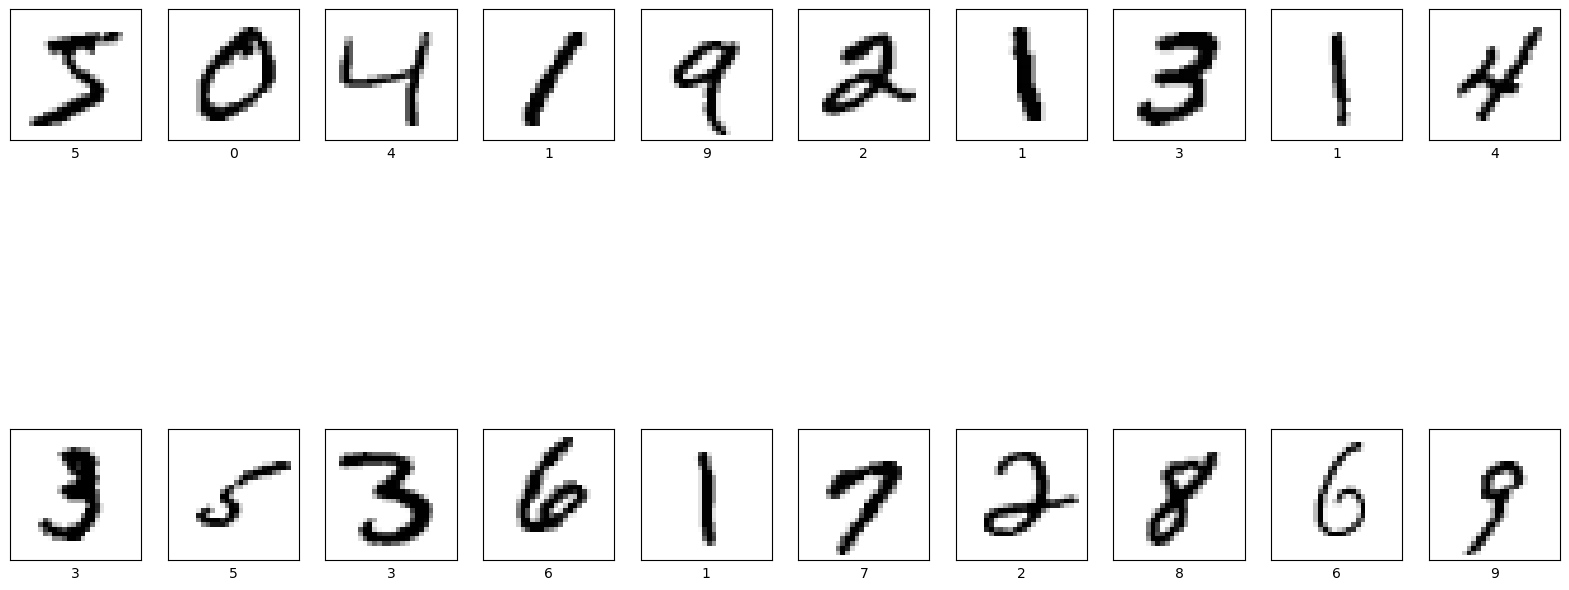

In [3]:
# 将数据集前20个图片数据可视化显示
# 进行图像大小为20宽、10长的绘图(单位为英寸inch)
plt.figure(figsize=(20,10))
# 遍历MNIST数据集下标数值0~49
for i in range(20):
    # 将整个figure分成5行10列，绘制第i+1个子图。
    plt.subplot(2,10,i+1)
    # 设置不显示x轴刻度
    plt.xticks([])
    # 设置不显示y轴刻度
    plt.yticks([])
    # 设置不显示子图网格线
    plt.grid(False)
    # 图像展示，cmap为颜色图谱，"plt.cm.binary"为matplotlib.cm中的色表
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    # 设置x轴标签显示为图片对应的数字
    plt.xlabel(train_labels[i])
# 显示图片
plt.show()

In [4]:
#调整数据到我们需要的格式
train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

train_images, test_images = train_images / 255.0, test_images / 255.0

train_images.shape,test_images.shape,train_labels.shape,test_labels.shape

((60000, 28, 28, 1), (10000, 28, 28, 1), (60000,), (10000,))

In [5]:
# 创建并设置卷积神经网络
# 卷积层：通过卷积操作对输入图像进行降维和特征抽取
# 池化层：是一种非线性形式的下采样。主要用于特征降维，压缩数据和参数的数量，减小过拟合，同时提高模型的鲁棒性。
# 全连接层：在经过几个卷积和池化层之后，神经网络中的高级推理通过全连接层来完成。
model = models.Sequential([
    # 设置二维卷积层1，设置32个3*3卷积核，activation参数将激活函数设置为ReLu函数，input_shape参数将图层的输入形状设置为(28, 28, 1)
    # ReLu函数作为激活励函数可以增强判定函数和整个神经网络的非线性特性，而本身并不会改变卷积层
    # 相比其它函数来说，ReLU函数更受青睐，这是因为它可以将神经网络的训练速度提升数倍，而并不会对模型的泛化准确度造成显著影响。
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    #池化层1，2*2采样
    layers.MaxPooling2D((2, 2)),                   
    # 设置二维卷积层2，设置64个3*3卷积核，activation参数将激活函数设置为ReLu函数
    layers.Conv2D(64, (3, 3), activation='relu'),  
    #池化层2，2*2采样
    layers.MaxPooling2D((2, 2)),                   
    layers.Flatten(),                    #Flatten层，连接卷积层与全连接层
    layers.Dense(64, activation='relu'), #全连接层，特征进一步提取，64为输出空间的维数，activation参数将激活函数设置为ReLu函数
    layers.Dense(10)                     #输出层，输出预期结果，10为输出空间的维数
])
# 打印网络结构
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 64)                1

In [6]:
"""
这里设置优化器、损失函数以及metrics
这三者具体介绍可参考我的博客：
https://blog.csdn.net/qq_38251616/category_10258234.html
"""
# model.compile()方法用于在配置训练方法时，告知训练时用的优化器、损失函数和准确率评测标准
model.compile(
    # 设置优化器为Adam优化器
    optimizer='adam',
    # 设置损失函数为交叉熵损失函数（tf.keras.losses.SparseCategoricalCrossentropy()）
    # from_logits为True时，会将y_pred转化为概率（用softmax），否则不进行转换，通常情况下用True结果更稳定
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    # 设置性能指标列表，将在模型训练时监控列表中的指标
    metrics=['accuracy'])

In [7]:
"""
这里设置输入训练数据集（图片及标签）、验证数据集（图片及标签）以及迭代次数epochs
关于model.fit()函数的具体介绍可参考我的博客：
https://blog.csdn.net/qq_38251616/category_10258234.html
"""
history = model.fit(
    # 输入训练集图片
    train_images, 
    # 输入训练集标签
    train_labels, 
    # 设置10个epoch，每一个epoch都将会把所有的数据输入模型完成一次训练。
    epochs=10, 
    # 设置验证集
    validation_data=(test_images, test_labels))

Epoch 1/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.6781 - accuracy: 0.7805 - val_loss: 0.2769 - val_accuracy: 0.9149
Epoch 2/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.2271 - accuracy: 0.9321 - val_loss: 0.1609 - val_accuracy: 0.9532
Epoch 3/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.1456 - accuracy: 0.9563 - val_loss: 0.1091 - val_accuracy: 0.9669
Epoch 4/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.1116 - accuracy: 0.9663 - val_loss: 0.0865 - val_accuracy: 0.9748
Epoch 5/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0938 - accuracy: 0.9714 - val_loss: 0.0751 - val_accuracy: 0.9764
Epoch 6/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0833 - accuracy: 0.9741 - val_loss: 0.0809 - val_accuracy: 0.9750
Epoch 7/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0753 - accuracy: 0.9767 - val_loss: 0.0708 - val_ac

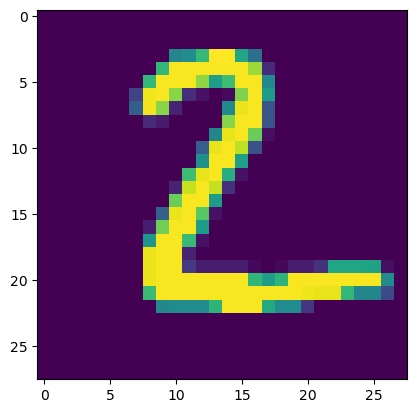

In [10]:
plt.imshow(test_images[1])

In [11]:
pre = model.predict(test_images) # 对所有测试图片进行预测
pre[1] # 输出第一张图片的预测结果

313/313 [==============================] - 1s 3ms/step


array([  8.836972 ,   8.495686 ,  17.199331 ,   1.9705975, -22.823599 ,
        -5.841512 ,  -2.3571057, -11.578103 ,   1.3492373, -16.942444 ],
      dtype=float32)